# Arindam Chakraborty
## Executive PG Program in Data Science - Capstone Project

### Loan Application Approval Prediction using Machine Learning


#The major aim of this notebook is to predict which of the customers will have their loan approved.

# Data Id 📋
This dataset is named Loan Prediction Dataset.The dataset contains a set of 614 records under 13 attributes:
https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset

The main objective for this dataset:
Using machine learning techniques to predict loan payments.

target value: Loan_Status

# Libraries 📕📗📘

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

#warning handle
warnings.filterwarnings("ignore")

# File path 📂

In [2]:
#path for the training set
tr_path = "train.csv"

#path for the testing set
te_path = "test.csv"

# Preprocessing and Data Analysis 💻
## First look at the data:

### Training set:

In [3]:
# read in csv file as a DataFrame
tr_df = pd.read_csv(tr_path)
# explore the first 5 rows
tr_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Testing set:

In [4]:
# read in csv file as a DataFrame
te_df = pd.read_csv(te_path)
# explore the first 5 rows
te_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# Size of each data set:

In [5]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (614, 13)

testing set (row, col): (367, 12)


## Now the focus is shifted for the preprocessing of the training dataset.

In [6]:
#column information
tr_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
#summary statistics
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
#the Id column is not needed, let's drop it for both test and train datasets
tr_df.drop('Loan_ID',axis=1,inplace=True)
te_df.drop('Loan_ID',axis=1,inplace=True)

In [9]:
#checking the new shapes
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (614, 12)

testing set (row, col): (367, 11)


# Missing values 🚫
As we can see we have some missing data, let's have a look how many we have for each column:

In [10]:
#missing values in decsending order
tr_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

Each value will be replaced by the most frequent value (mode). 
E.G. Credit_History has 50 null values and has 2 unique values 1.0 (475 times) or 0.0 (89 times) therefore each null value will be replaced by the mode 1.0 so now it will show in our data 525 times.

In [11]:
#filling the missing data
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{tr_df[col].value_counts()}\n","-"*50)
    tr_df[col] = tr_df[col].fillna(tr_df[col].dropna().mode().values[0] )   

    
tr_df.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n\n","#"*50,"\n")
for col in null_cols:
    print(f"\n{col}:\n{tr_df[col].value_counts()}\n","-"*50)

Before filling missing values

 ################################################## 

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
 --------------------------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      489
Female    112
Name: Gender, dtype

# Data visalization 📊
## Loan status distribution

In [12]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  tr_df[num]
#categoric df
loan_cat = tr_df[cat]

In [13]:
print(tr_df[cat[-1]].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


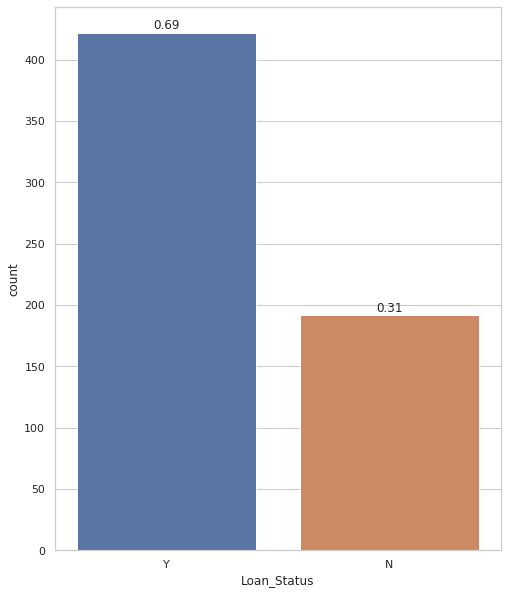

In [14]:
total = float(len(tr_df[cat[-1]]))
plt.figure(figsize=(8,10))
sns.set(style="whitegrid")
ax = sns.countplot(tr_df[cat[-1]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center") 
plt.show()

## Let's plot our data

### Numeric:

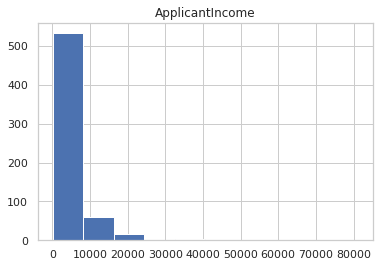

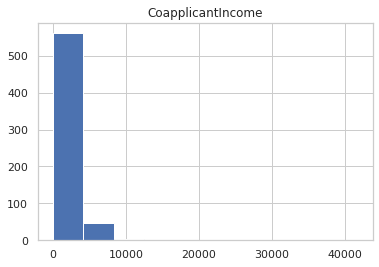

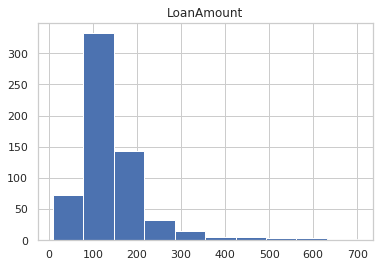

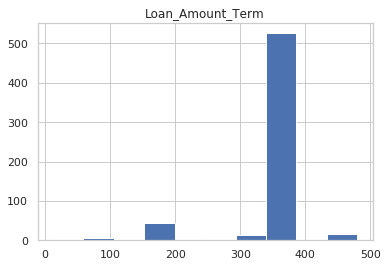

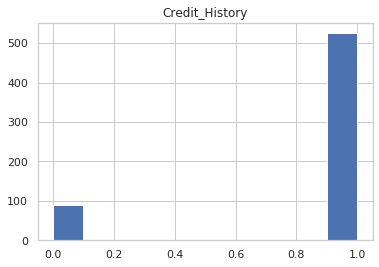

In [15]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

### Categorical (split by Loan status):

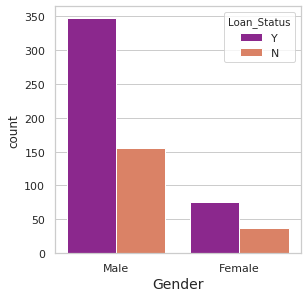

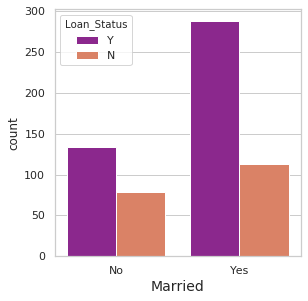

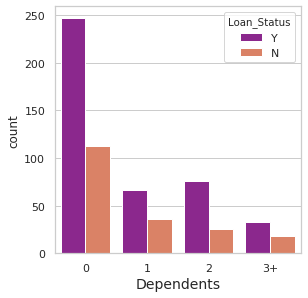

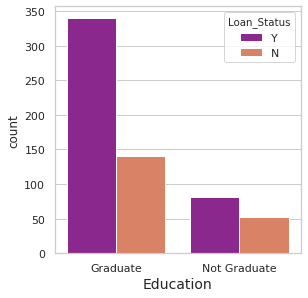

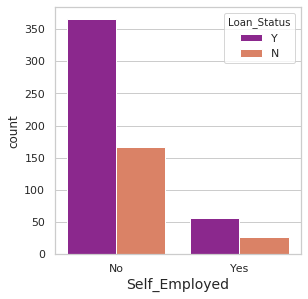

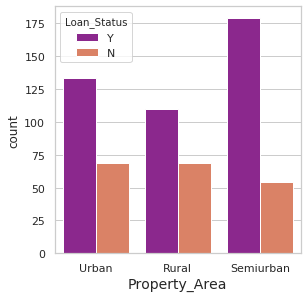

In [16]:
for i in cat[:-1]: 
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data=tr_df ,palette='plasma')
    plt.xlabel(i, fontsize=14)

## Encoding data to numeric

In [17]:
#converting categorical values to numbers

to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

# adding the new numeric values from the to_numeric variable to both datasets
tr_df = tr_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)
te_df = te_df.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

# converting the Dependents column
Dependents_ = pd.to_numeric(tr_df.Dependents)
Dependents__ = pd.to_numeric(te_df.Dependents)

# dropping the previous Dependents column
tr_df.drop(['Dependents'], axis = 1, inplace = True)
te_df.drop(['Dependents'], axis = 1, inplace = True)

# concatination of the new Dependents column with both datasets
tr_df = pd.concat([tr_df, Dependents_], axis = 1)
te_df = pd.concat([te_df, Dependents__], axis = 1)

# checking the manipulated dataset for validation
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}\n")
print(tr_df.info(), "\n\n", te_df.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Gender               356 non-null float64
Married              367 non-null int64
Education            367 non-null int64
Self_Employed        344 non-null float64
ApplicantIncome 

## Correlation matrix

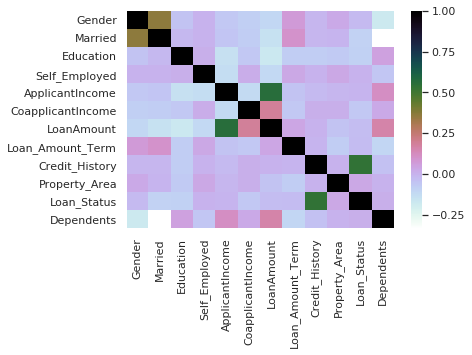

In [18]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='cubehelix_r')

### Correlation table for a more detailed analysis:

In [19]:
#correlation table
corr = tr_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1,0.36,-0.045,-0.00052,-0.059,-0.083,-0.11,0.074,-0.0092,0.026,-0.018,-0.17
Married,0.36,1,-0.012,0.0045,-0.052,-0.076,-0.15,0.1,-0.011,-0.0043,-0.091,-0.33
Education,-0.045,-0.012,1,0.01,-0.14,-0.062,-0.17,-0.074,-0.074,-0.065,-0.086,0.056
Self_Employed,-0.00052,0.0045,0.01,1,-0.13,0.016,-0.11,0.034,0.0016,0.031,0.0037,-0.057
ApplicantIncome,-0.059,-0.052,-0.14,-0.13,1,-0.12,0.56,-0.047,-0.019,-0.0095,-0.0047,0.12
CoapplicantIncome,-0.083,-0.076,-0.062,0.016,-0.12,1,0.19,-0.059,0.011,0.011,-0.059,0.03
LoanAmount,-0.11,-0.15,-0.17,-0.11,0.56,0.19,1,0.037,-0.00025,-0.047,-0.032,0.16
Loan_Amount_Term,0.074,0.1,-0.074,0.034,-0.047,-0.059,0.037,1,-0.0047,-0.076,-0.023,-0.1
Credit_History,-0.0092,-0.011,-0.074,0.0016,-0.019,0.011,-0.00025,-0.0047,1,0.002,0.54,-0.04
Property_Area,0.026,-0.0043,-0.065,0.031,-0.0095,0.011,-0.047,-0.076,0.002,1,0.032,-0.00024


# Machine Learning Models

In [20]:
y = tr_df['Loan_Status']
X = tr_df.drop('Loan_Status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Decision Tree:

In [21]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_predict = DT.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.44      0.55      0.49        51
           1       0.81      0.74      0.77       134

    accuracy                           0.69       185
   macro avg       0.63      0.64      0.63       185
weighted avg       0.71      0.69      0.70       185

68.65% Accurate


In [22]:
Decision_Tree=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Decision Tree.csv")

## Random Forest:

In [23]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.68      0.41      0.51        51
           1       0.81      0.93      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.76       185

78.38% Accurate


In [24]:
Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv")

## XGBoost:

In [25]:
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.82      0.45      0.58        51
           1       0.82      0.96      0.89       134

    accuracy                           0.82       185
   macro avg       0.82      0.71      0.73       185
weighted avg       0.82      0.82      0.80       185

82.16% Accurate


In [26]:
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")

## Logistic Regression:

In [27]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

y_predict = LR.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print(f"{round(LR_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

83.24% Accurate


In [28]:
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")

# Conclusion:

In [29]:
score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score', ascending=True)

,n_neighbors,Score
0,Decision Tree,0.686486
1,Random Forest,0.783784
2,XGBoost,0.821622
3,Logistic Regression,0.832432
